<a href="https://colab.research.google.com/github/TapirandKapibara/themachinelearning/blob/main/Experiment_1_27_08_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using the SVM to classify the sequences




**Importing the packages that I need**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

<b> Mounting to google drive <b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the dataset**
<p> Description of the dataset: </p>
<p> The dataset consists of 26467 sequences 13234 are not a hotspots (label = 1)and 13233 are hotspots (label = 0)</p>
<p> The free folding energy was calclulated using Vienna RNA software and GC content was also calculated </p>

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data_folder/energy_GC_data.csv")
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,sequence,label,energy,GC_content
0,acagaagcaacggaagaagcacataaatattcttatgaggtccaac...,1,-4.8,40.0
1,cggacataaagagagtcctccttatgatgattatatacctcaacgc...,1,-5.7,38.0
2,ccaaaagtggaagtaaatccatgtgaaatagtaaacacactattta...,1,-8.5,32.0
3,tcgacaaactgttctgatgataatgaaggtacgaaatgtctaaaat...,1,-4.3,32.0
4,gatggatggagtgcgcaggacgtaaaagattttacatatgagaaca...,1,-2.7,44.0


### Labels that will represent the label of the sequence
<p> <strong>1 </strong> : not a hot spot </p>
<p> <strong>0 </strong> : hot spot </p>

### One-Hot encoding of the sequences: ##
<p> Each nucleotide is converted to the matrix. 
</p>
<blockquote>
'a':[1,0,0,0], 't':[0,1,0,0], 'c':[0,0,1,0], 'g':[0,0,0,1]
</blockquote>

In [ ]:
sequence = list(df.loc[:, 'sequence']) # convert the column sequence to the list [:, column_name] means the entire column
#print(sequence)
#print(len(sequence))
#print(sequence[-1])
encoded_list = []
def encode_seq(s):
  Encode = {'a':[1,0,0,0],'t':[0,1,0,0],'c':[0,0,1,0],'g':[0,0,0,1]} # dictionary that converts the nucleotides to the matrixes
  return [Encode[x] for x in s] # applying funcion for each x (nucleotide) in sequence

for i in sequence:    # applying it to the dataset sequence
  x = encode_seq(i)
  encoded_list.append(x)
X_array = np.array(encoded_list, dtype = object)
print("X_array shape is", X_array.shape) # print the shape. It will be 16, 50, 4. There are 16 sequences, each consits of 50 nucleotides. Each nucleotide encded by 4 digits

X_array shape is (26467, 50, 4)


Reshaping the X_array so that is is transformed to the two-dimensional matrix

In [ ]:
x_array_reshaped = np.reshape(X_array, (int(len((sequence))), 200)) # 200 = 50*4
print(" shape after reshaping is", x_array_reshaped.shape)

 shape after reshaping is (26467, 200)


Defining the labels 

In [ ]:
df_label = df.loc[:, "label"]
print(" shape of the label dataset is ", df_label.shape)

 shape of the label dataset is  (26467,)


<b> Experiment 1.1 </b>
<p> Constructing the model in which only the sequenes and the labels will be used </p> 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_array_reshaped, df_label, test_size = 0.20)

Using <strong> linear kernel </strong>

In [ ]:
svclassifier = SVC(kernel = "linear")
svclassifier.fit(x_train, y_train)
label_pred = svclassifier.predict(x_test)
print(accuracy_score(y_test, label_pred))
print(classification_report(y_test, label_pred))

0.6939931998488855
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      2660
           1       0.69      0.71      0.70      2634

    accuracy                           0.69      5294
   macro avg       0.69      0.69      0.69      5294
weighted avg       0.69      0.69      0.69      5294



Using <strong> polynomial kernel </strong>

In [ ]:
svclassifier1 = SVC(kernel = "poly", degree = 6)
svclassifier1.fit(x_train, y_train)
label_pred1 = svclassifier1.predict(x_test)
print(accuracy_score(y_test, label_pred1))
print(classification_report(y_test, label_pred1))

0.8554967888175293
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2660
           1       0.83      0.90      0.86      2634

    accuracy                           0.86      5294
   macro avg       0.86      0.86      0.86      5294
weighted avg       0.86      0.86      0.86      5294



Using <strong> Gaussian kernel </strong>

In [ ]:
svclassifier2 = SVC(kernel = "rbf")
svclassifier2.fit(x_train, y_train)
label_pred2 = svclassifier2.predict(x_test)
print(accuracy_score(y_test, label_pred2))
print(classification_report(y_test, label_pred2))

0.8282961843596525
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2660
           1       0.83      0.83      0.83      2634

    accuracy                           0.83      5294
   macro avg       0.83      0.83      0.83      5294
weighted avg       0.83      0.83      0.83      5294



Using <strong> sigmoid kernel </strong>

In [ ]:
svclassifier3 = SVC(kernel = "sigmoid")
svclassifier3.fit(x_train, y_train)
label_pred3 = svclassifier3.predict(x_test)
print(accuracy_score(y_test, label_pred3))
print(classification_report(y_test, label_pred3))

0.5460899131091802
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      2660
           1       0.54      0.57      0.55      2634

    accuracy                           0.55      5294
   macro avg       0.55      0.55      0.55      5294
weighted avg       0.55      0.55      0.55      5294



## Introducing the folding energy to the equation. The encoding of the sequence stays the same. 

Lets Plot the energy against the label and see if there is any pattern

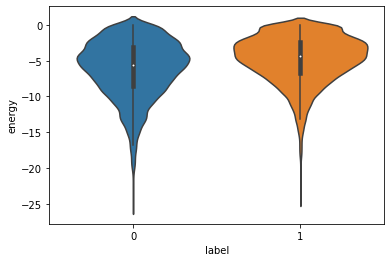

In [ ]:
plr = sns.violinplot(x = "label", y = "energy", data = df)

Before being used in the equation the energy needs to be normalized so that values are around 1.  Normalizing the energy

In [ ]:
maxClm = df['energy'].max()
print("Maximum value in column 'energy': " )
print(maxClm)
minClm = df['energy'].min()

print("Minimum value in column 'energy': " )
print(minClm)
energy_mean = df["energy"].mean()
print("energy mean", energy_mean)
energy_st_dev = df['energy'].std() 
print(energy_st_dev)

Maximum value in column 'energy': 
0.0
Minimum value in column 'energy': 
-25.200000762939453
energy mean -5.505367440073611
3.768630124794974


In [ ]:
norm_energy_list = []
epsilon = 1e-10
energy_list = list(df.loc[:, 'energy'])
for ittem in energy_list:
  energy_norm = (ittem - energy_mean)/(energy_st_dev + epsilon)
  norm_energy_list.append(energy_norm)


In [ ]:
df_energy_norm = pd.DataFrame (norm_energy_list, columns = ['energy normalised'])

In [ ]:
df_energy_norm.head(3)

,energy normalised
0,0.187168
1,-0.051645
2,-0.794621


Lets convert the reshaped encoded seaquences to the dataframe.

In [ ]:
df_reshaped_encoded_seq = pd.DataFrame(x_array_reshaped)
df_reshaped_encoded_seq.head(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_reshaped_encoded_seq.shape

(26467, 200)

Now we just concat the two dataframes. This will be our x variable

In [ ]:
df_seq_and_energy = pd.concat([df_reshaped_encoded_seq, df_energy_norm], axis=1)
df_seq_and_energy.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,energy normalised
0,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0.187168
1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,-0.051645
2,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,-0.794621
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0.319842
4,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0.744400


Construct the model

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_seq_and_energy, df_label, test_size = 0.20)

<strong> Using linear kernel </strong>

In [ ]:
svclassifier4 = SVC(kernel = "linear")
svclassifier4.fit(x_train1, y_train1)
label_pred4 = svclassifier4.predict(x_test1)
print(accuracy_score(y_test1, label_pred4))
print(classification_report(y_test, label_pred4))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7032489610880241
              precision    recall  f1-score   support

           0       0.49      0.47      0.48      2660
           1       0.49      0.51      0.50      2634

    accuracy                           0.49      5294
   macro avg       0.49      0.49      0.49      5294
weighted avg       0.49      0.49      0.49      5294



<strong> Using polynomial kernal </strong>

In [ ]:
svclassifier5 = SVC(kernel = "poly", degree = 6)
svclassifier5.fit(x_train1, y_train1)
label_pred5 = svclassifier5.predict(x_test1)
print(accuracy_score(y_test1, label_pred5))
print(classification_report(y_test1, label_pred5))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8619191537589724
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      2674
           1       0.83      0.91      0.87      2620

    accuracy                           0.86      5294
   macro avg       0.87      0.86      0.86      5294
weighted avg       0.87      0.86      0.86      5294



<strong> Using rbf kernel </strong>

In [ ]:
svclassifier6 = SVC(kernel = "rbf")
svclassifier6.fit(x_train1, y_train1)
label_pred6 = svclassifier6.predict(x_test1)
print(accuracy_score(y_test1, label_pred6))
print(classification_report(y_test1, label_pred6))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8354741216471477
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2674
           1       0.83      0.85      0.84      2620

    accuracy                           0.84      5294
   macro avg       0.84      0.84      0.84      5294
weighted avg       0.84      0.84      0.84      5294



<strong> sigmoid kernel<strong/> 

In [ ]:
svclassifier7 = SVC(kernel = "sigmoid")
svclassifier7.fit(x_train1, y_train1)
label_pred7 = svclassifier7.predict(x_test1)
print(accuracy_score(y_test1, label_pred7))
print(classification_report(y_test1, label_pred7))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.5487344163203627
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      2674
           1       0.54      0.56      0.55      2620

    accuracy                           0.55      5294
   macro avg       0.55      0.55      0.55      5294
weighted avg       0.55      0.55      0.55      5294



##Adding the GC content to the problem

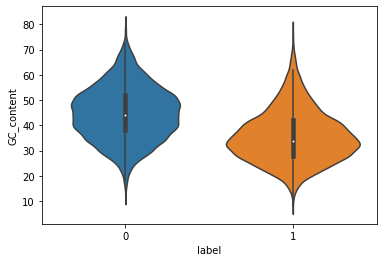

In [ ]:
plr2 = sns.violinplot(x = "label", y = "GC_content", data = df)



 Normalizing the GC content

In [ ]:
GC_mean = df["GC_content"].mean()
print("GC content mean", GC_mean)
GC_st_dev = df['GC_content'].std() 
print(GC_st_dev)

GC content mean 40.338383647561116
11.338810908287126


In [ ]:
norm_GC_list = []
epsilon = 1e-10
GC_list = list(df.loc[:, "GC_content"])
for ittem in GC_list:
  GC_norm = (ittem - GC_mean)/(4*(GC_st_dev + epsilon))
  norm_GC_list.append(GC_norm)

In [ ]:
df_GC_norm = pd.DataFrame (norm_GC_list, columns = ['GC normalised'])
df_GC_norm.head()

,GC normalised
0,-0.007461
1,-0.051557
2,-0.183846
3,-0.183846
4,0.080732


Constructing the x dataframe for the problem that involves GC content. This will be used as x variable

In [ ]:
df_seq_energy_GC = pd.concat([df_reshaped_encoded_seq, df_energy_norm, df_GC_norm], axis=1)
df_seq_energy_GC.head()

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,energy normalised,GC normalised
0,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0.187168,-0.007461
1,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,-0.051645,-0.051557
2,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,-0.794621,-0.183846
3,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0.319842,-0.183846
4,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0.744400,0.080732


Constructing the model that will include energy, sequences and GC content

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_seq_energy_GC, df_label, test_size = 0.20)

<strong> Using linear kernel </strong>

In [ ]:
svclassifier8 = SVC(kernel = "linear")
svclassifier8.fit(x_train2, y_train2)
label_pred8 = svclassifier8.predict(x_test2)
print(accuracy_score(y_test2, label_pred8))
print(classification_report(y_test2, label_pred8))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.6970154892330941
              precision    recall  f1-score   support

           0       0.70      0.67      0.69      2626
           1       0.69      0.72      0.71      2668

    accuracy                           0.70      5294
   macro avg       0.70      0.70      0.70      5294
weighted avg       0.70      0.70      0.70      5294



<strong> Using polynomilal kernel </strong>

In [ ]:
svclassifier9 = SVC(kernel = "poly", degree = 6)
svclassifier9.fit(x_train2, y_train2)
label_pred9 = svclassifier9.predict(x_test2)
print(accuracy_score(y_test2, label_pred9))
print(classification_report(y_test2, label_pred9))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8549301095579902
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2626
           1       0.83      0.90      0.86      2668

    accuracy                           0.85      5294
   macro avg       0.86      0.85      0.85      5294
weighted avg       0.86      0.85      0.85      5294



<strong> Using rbf kerbel </strong>

In [ ]:
svclassifier10 = SVC(kernel = "rbf")
svclassifier10.fit(x_train2, y_train2)
label_pred10 = svclassifier10.predict(x_test2)
print(accuracy_score(y_test2, label_pred10))
print(classification_report(y_test2, label_pred10))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8216849263316962
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2626
           1       0.82      0.83      0.82      2668

    accuracy                           0.82      5294
   macro avg       0.82      0.82      0.82      5294
weighted avg       0.82      0.82      0.82      5294



<strong> Using sigmoid kernel </strong>

In [ ]:
svclassifier11 = SVC(kernel = "sigmoid")
svclassifier11.fit(x_train2, y_train2)
label_pred11 = svclassifier11.predict(x_test2)
print(accuracy_score(y_test2, label_pred11))
print(classification_report(y_test2, label_pred11))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.5513789195315452
              precision    recall  f1-score   support

           0       0.55      0.51      0.53      2626
           1       0.55      0.59      0.57      2668

    accuracy                           0.55      5294
   macro avg       0.55      0.55      0.55      5294
weighted avg       0.55      0.55      0.55      5294



##Thre dataframe that includes sequences and GC content 



In [ ]:
df_seq_GC = pd.concat([df_reshaped_encoded_seq, df_GC_norm], axis=1)
df_seq_GC.head(3)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,GC normalised
0,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-0.007461
1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,-0.051557
2,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,-0.183846


In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(df_seq_GC, df_label, test_size = 0.20)

<strong> Using linear kernel </strong> 

In [ ]:
svclassifier12 = SVC(kernel = "linear")
svclassifier12.fit(x_train3, y_train3)
label_pred12 = svclassifier12.predict(x_test3)
print(accuracy_score(y_test3, label_pred12))
print(classification_report(y_test3, label_pred12))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.701926709482433
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2663
           1       0.69      0.72      0.71      2631

    accuracy                           0.70      5294
   macro avg       0.70      0.70      0.70      5294
weighted avg       0.70      0.70      0.70      5294



<strong> Using polynomial kernel <strong/>

In [ ]:
svclassifier13 = SVC(kernel = "poly", degree = 6)
svclassifier13.fit(x_train3, y_train3)
label_pred13 = svclassifier13.predict(x_test3)
print(accuracy_score(y_test3, label_pred13))
print(classification_report(y_test3, label_pred13))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8621080468454855
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2663
           1       0.83      0.91      0.87      2631

    accuracy                           0.86      5294
   macro avg       0.87      0.86      0.86      5294
weighted avg       0.87      0.86      0.86      5294



<strong> Using rbf kernel </strong> 

In [ ]:
svclassifier14 = SVC(kernel = "rbf")
svclassifier14.fit(x_train3, y_train3)
label_pred14 = svclassifier14.predict(x_test3)
print(accuracy_score(y_test3, label_pred14))
print(classification_report(y_test3, label_pred14))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8326407253494522
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2663
           1       0.83      0.83      0.83      2631

    accuracy                           0.83      5294
   macro avg       0.83      0.83      0.83      5294
weighted avg       0.83      0.83      0.83      5294



<strong> Using sigmoid kernel </strong>

In [ ]:
svclassifier15 = SVC(kernel = "sigmoid")
svclassifier15.fit(x_train3, y_train3)
label_pred15 = svclassifier15.predict(x_test3)
print(accuracy_score(y_test3, label_pred15))
print(classification_report(y_test3, label_pred15))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.539100868908198
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      2663
           1       0.53      0.56      0.55      2631

    accuracy                           0.54      5294
   macro avg       0.54      0.54      0.54      5294
weighted avg       0.54      0.54      0.54      5294



Based on:
https://intellipaat.com/blog/tutorial/machine-learning-tutorial/svm-algorithm-in-python/

https://www.statology.org/sklearn-classification-report/